**Practical 3 : Write Python programs using Gymnasium to simulate CartPole-v1, MountainCar-v0, and Pendulum-v1. For each environment: display the observation and action spaces, run a short simulation using a simple custom policy (not random), render the environment, and calculate the total reward.**

Procedure:
1. Import required libraries such as gym, numpy, and matplotlib.
2. Initialize the CartPole environment using gym.make('CartPole-v1').
3. Define agent logic (either random action selection or policy-based).
4. Train the agent over multiple episodes and track rewards.
5. Visualize training performance with reward plots.
6. Analyze results and determine whether the agent successfully balances the pole.

# PENDULUM

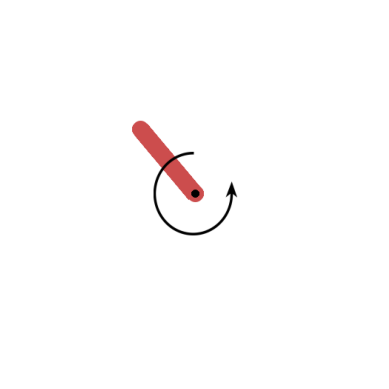


Step: 200
Observation: [0.46315914 0.8862751  7.8293514 ]  (cos(θ), sin(θ), θ̇)
Action taken: [2.]
Reward: -5.458
Terminated: False, Truncated: True
Cumulative reward: -1571.44

Episode ended after step 200

Final total reward: -1571.4387945911644


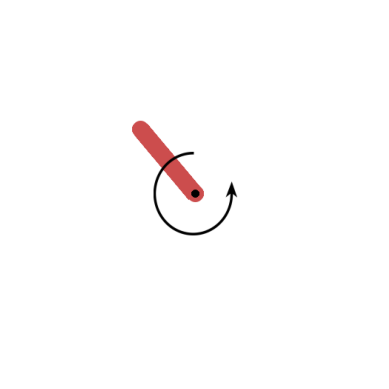

In [ ]:
import numpy as np
import gymnasium as gym
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Create environment
env = gym.make("Pendulum-v1", render_mode='rgb_array')

# Reset environment
obs, info = env.reset()
total_reward = 0
print('Initial Observation:', obs)
print('Observation space:', env.observation_space)
print('Action space:', env.action_space)
print('Initial Info:', info)

# Simulation loop
for step in range(500):
    # Render and display frame
    frame = env.render()
    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())

    # Extract angular velocity from observation
    ang_vel = obs[2]

    # Custom policy: apply torque if angular velocity is positive
    action = np.array([2.0 if ang_vel > 0 else 0.0], dtype=np.float32)

    # Take action
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    # Print all step info
    print(f"\nStep: {step+1}")
    print(f"Observation: {obs}  (cos(θ), sin(θ), θ̇)")
    print(f"Action taken: {action}")
    print(f"Reward: {reward:.3f}")
    print(f"Terminated: {terminated}, Truncated: {truncated}")
    print(f"Cumulative reward: {total_reward:.2f}")

    time.sleep(0.01)

    if terminated or truncated:
        print(f"\nEpisode ended after step {step+1}")
        break

print("\nFinal total reward:", total_reward)
env.close()

# CARTPOLE

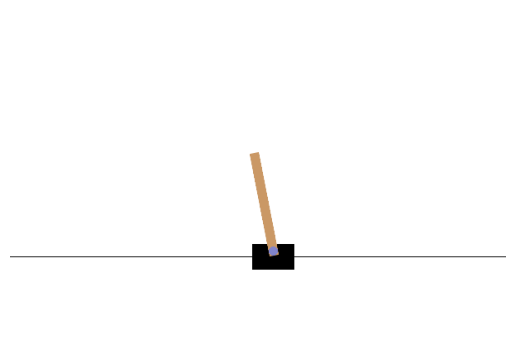


Step: 9
Observation: [ 0.17675662  1.7774689  -0.2414115  -2.8113525 ] (cart position, velocity, pole angle, angular velocity)
Action: 1
Reward: 1.0
Terminated: True, Truncated: False
Cumulative Reward: 9.00
Episode terminated after 9 steps.


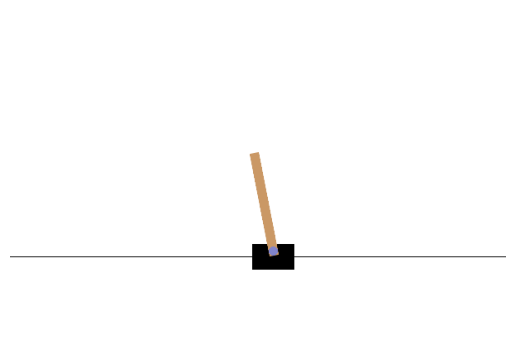

In [ ]:
import gymnasium as gym
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

env = gym.make("CartPole-v1", render_mode="rgb_array")
obs, info = env.reset()
total_reward = 0
print("Initial Observation:", obs)
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)
print("Info:", info)

for step in range(200):
    frame = env.render()
    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())

    angle = obs[2]
    angle_vel = obs[3]
    loc = obs[0]
    action = 1 if (loc < 2.4 and loc > -2.4) else 0

    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    print(f"\nStep: {step+1}")
    print(f"Observation: {obs} (cart position, velocity, pole angle, angular velocity)")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}, Truncated: {truncated}")
    print(f"Cumulative Reward: {total_reward:.2f}")

    time.sleep(0.05)

    if terminated or truncated:
        print(f"Episode terminated after {step+1} steps.")
        break
env.close()

# MOUNTAIN CAR

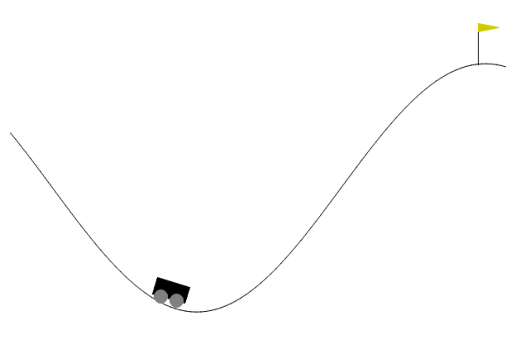


Step: 200
Observation: [-0.61593205  0.00789619] (position, velocity)
Action: 2
Reward: -1.0
Terminated: False, Truncated: True
Cumulative Reward: -200.00
Episode terminated after 200 steps.


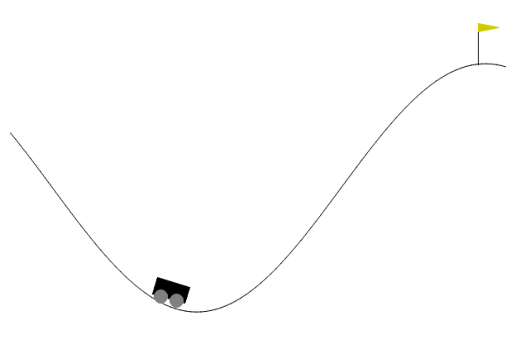

In [ ]:
env = gym.make("MountainCar-v0", render_mode="rgb_array")
obs, info = env.reset()
total_reward = 0
print("Initial Observation:", obs)
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)
print("Info:", info)

for step in range(200):
    frame = env.render()
    plt.imshow(frame)
    plt.axis('off')
    clear_output(wait=True)
    display(plt.gcf())

    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    print(f"\nStep: {step+1}")
    print(f"Observation: {obs} (position, velocity)")
    print(f"Action: {action}")
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}, Truncated: {truncated}")
    print(f"Cumulative Reward: {total_reward:.2f}")

    time.sleep(0.07)

    if terminated or truncated:
        print(f"Episode terminated after {step+1} steps.")
        break
env.close()

Observation:
Uses a random action policy where actions are selected randomly.
Rewards are tracked, but the agent does not improve because no learning algorithm is applied.
The notebook demonstrates the baseline performance of CartPole without Reinforcement Learning

Conclusion:
highlights the limitations of random policy actions in the CartPole environment — the pole falls quickly, and rewards stay low.